In [ ]:
from google.colab import drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Salinan uber-raw-data-janjune-15.csv")

In [ ]:
df.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65
2,B02617,2015-05-17 09:47:00,B02617,100
3,B02617,2015-05-17 09:47:00,B02774,80
4,B02617,2015-05-17 09:47:00,B02617,90


#analisa data dari file uber-raw-data-janjune-15.csv

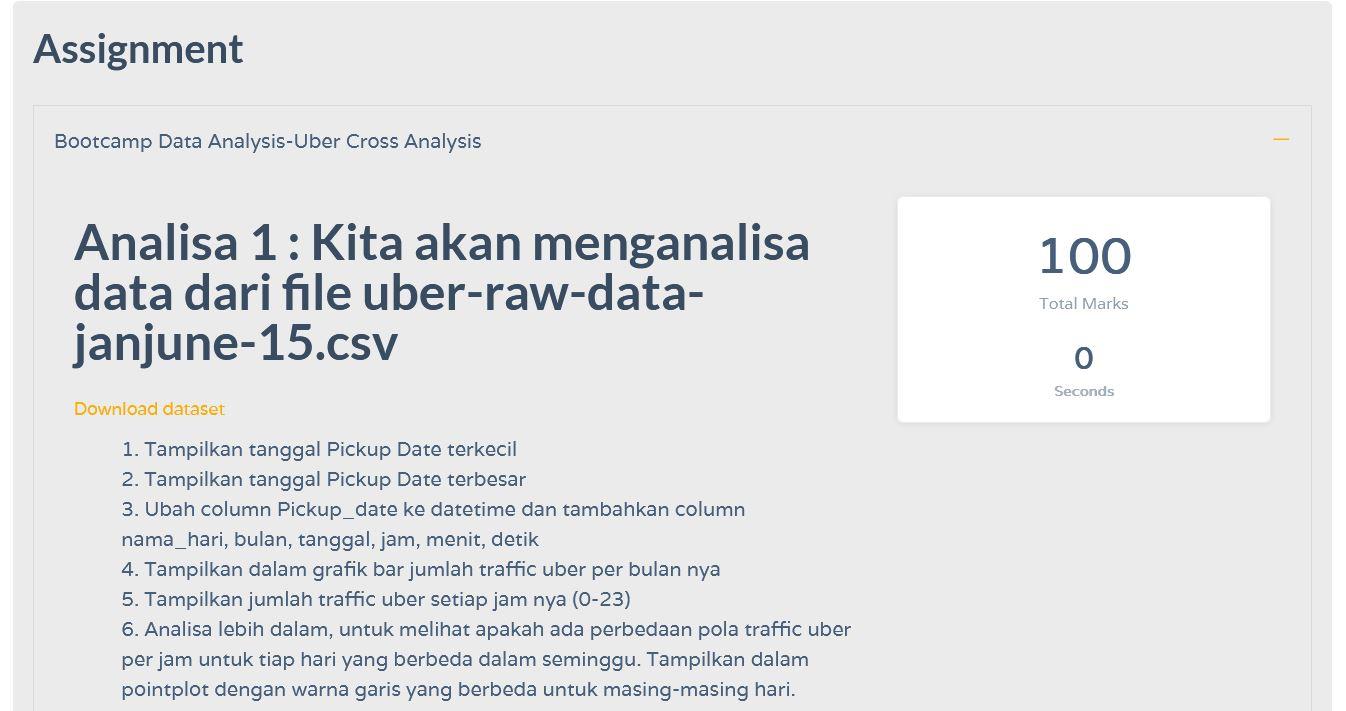

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14270479 entries, 0 to 14270478
Data columns (total 4 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   Dispatching_base_num  object
 1   Pickup_date           object
 2   Affiliated_base_num   object
 3   locationID            int64 
dtypes: int64(1), object(3)
memory usage: 435.5+ MB


In [ ]:
df["Pickup_date"] = pd.to_datetime(df["Pickup_date"], format="%Y/%m/%d %H:%M:%S")

In [ ]:
df.sample(2)

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
13158236,B02764,2015-02-13 19:59:02,B00448,90
9665085,B02617,2015-02-09 06:07:18,B02617,141


In [ ]:
#1
df["Pickup_date"].min()

Timestamp('2015-01-01 00:00:05')

In [ ]:
#2
df["Pickup_date"].max()

Timestamp('2015-06-30 23:59:00')

In [ ]:
#3
df["nama_hari"]=df["Pickup_date"].dt.day_name()
df["bulan"]=df["Pickup_date"].dt.month
df["tanggal"]=df["Pickup_date"].dt.day
df["jam"]=df["Pickup_date"].dt.hour
df["menit"]=df["Pickup_date"].dt.minute
df["detik"]=df["Pickup_date"].dt.second

In [ ]:
df.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,nama_hari,bulan,tanggal,jam,menit,detik
0,B02617,2015-05-17 09:47:00,B02617,141,Sunday,5,17,9,47,0
1,B02617,2015-05-17 09:47:00,B02617,65,Sunday,5,17,9,47,0
2,B02617,2015-05-17 09:47:00,B02617,100,Sunday,5,17,9,47,0
3,B02617,2015-05-17 09:47:00,B02774,80,Sunday,5,17,9,47,0
4,B02617,2015-05-17 09:47:00,B02617,90,Sunday,5,17,9,47,0


In [ ]:
df.describe()

,locationID,bulan,tanggal,jam,menit,detik
count,1.427048e+07,1.427048e+07,1.427048e+07,1.427048e+07,1.427048e+07,1.427048e+07
mean,1.520574e+02,3.697342e+00,1.590227e+01,1.409316e+01,2.940928e+01,8.665054e+00
std,7.159620e+01,1.706433e+00,8.702995e+00,6.623962e+00,1.728040e+01,1.635358e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.200000e+01,2.000000e+00,8.000000e+00,9.000000e+00,1.400000e+01,0.000000e+00
50%,1.570000e+02,4.000000e+00,1.600000e+01,1.600000e+01,2.900000e+01,0.000000e+00
75%,2.300000e+02,5.000000e+00,2.300000e+01,2.000000e+01,4.400000e+01,9.000000e+00
max,2.650000e+02,6.000000e+00,3.100000e+01,2.300000e+01,5.900000e+01,5.900000e+01


In [ ]:
var1 = df.groupby(["Pickup_date","bulan"])["bulan"].sum().reset_index(name="count")
var2 =var1[var1["bulan"]==1].count().reset_index(name="count")
var2

,index,count
0,Pickup_date,1244600
1,bulan,1244600
2,count,1244600


In [ ]:
df['bulan'].value_counts().index

Int64Index([6, 5, 4, 2, 3, 1], dtype='int64')

In [ ]:
#4

bln = ['Juni', 'Mei', 'April', 'Februari', 'Maret', 'Januari']
fig = px.bar(x=bln,
             y=df['bulan'].value_counts().values,
             title = 'Trafik Uber Per Bulan',
             labels={'x' : 'Periode', 'y' : 'Jumlah'})
fig.show()

In [ ]:
#5

fig = px.bar(x=df['jam'].value_counts().index,
             y=df['jam'].value_counts().values,
             title = 'Trafik Uber Berdasarkan Jam',
             labels={'x' : 'Waktu', 'y' : 'Jumlah'})
fig.show()

In [ ]:
#6
xx = df.groupby(['nama_hari','jam']).count().reset_index()

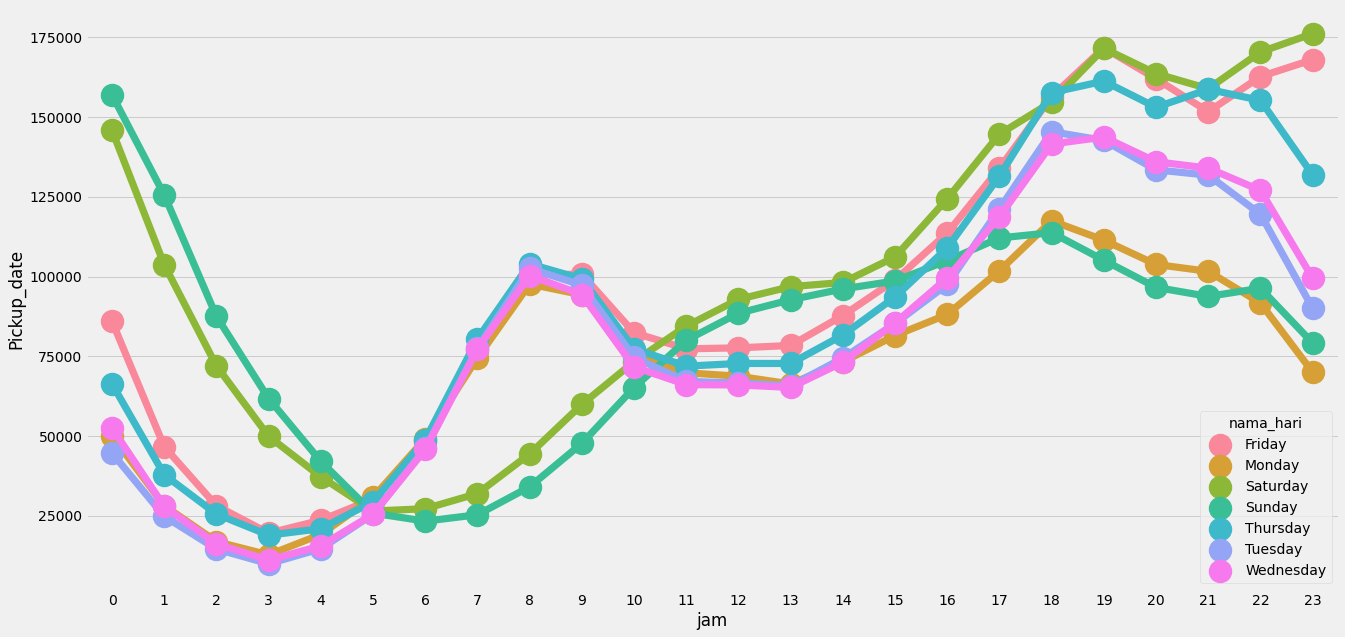

In [ ]:
plt.figure(figsize=(20,10))
sns.pointplot(data=xx, x='jam', y='Pickup_date', hue='nama_hari')

#Analisa data dari file Uber-Jan-Feb-FOIL.csv

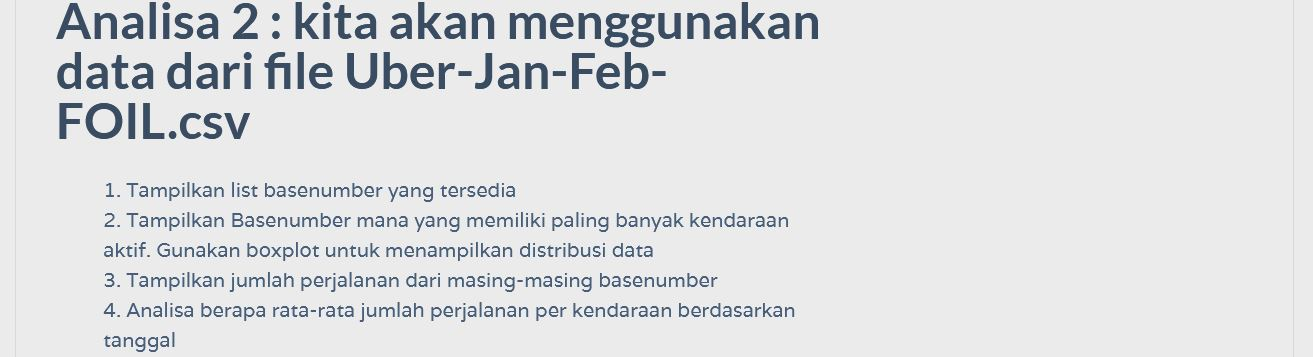

In [ ]:
df2 = pd.read_csv("/content/drive/MyDrive/Salinan Uber-Jan-Feb-FOIL.csv")

In [ ]:
df2["date"] = pd.to_datetime(df2["date"], format="%m/%d/%Y")

In [ ]:
df2["month"]=df2["date"].dt.month
df2["date"]=df2["date"].dt.day

In [ ]:
#1

list(df2.dispatching_base_number.unique())

['B02512', 'B02765', 'B02764', 'B02682', 'B02617', 'B02598']

AttributeError: ignored

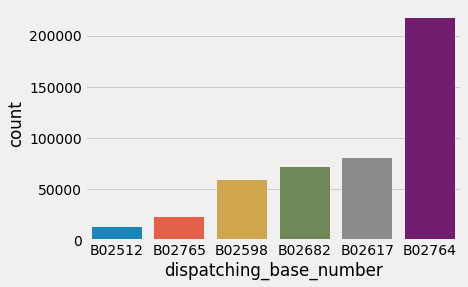

In [ ]:
#2
top_var2 = df2.groupby(["dispatching_base_number"])["active_vehicles"].sum().sort_values().reset_index(name="count")
ax = sns.barplot(data=top_var2 ,x="dispatching_base_number" ,y="count")
ax.bar_label(ax.containers[0]);

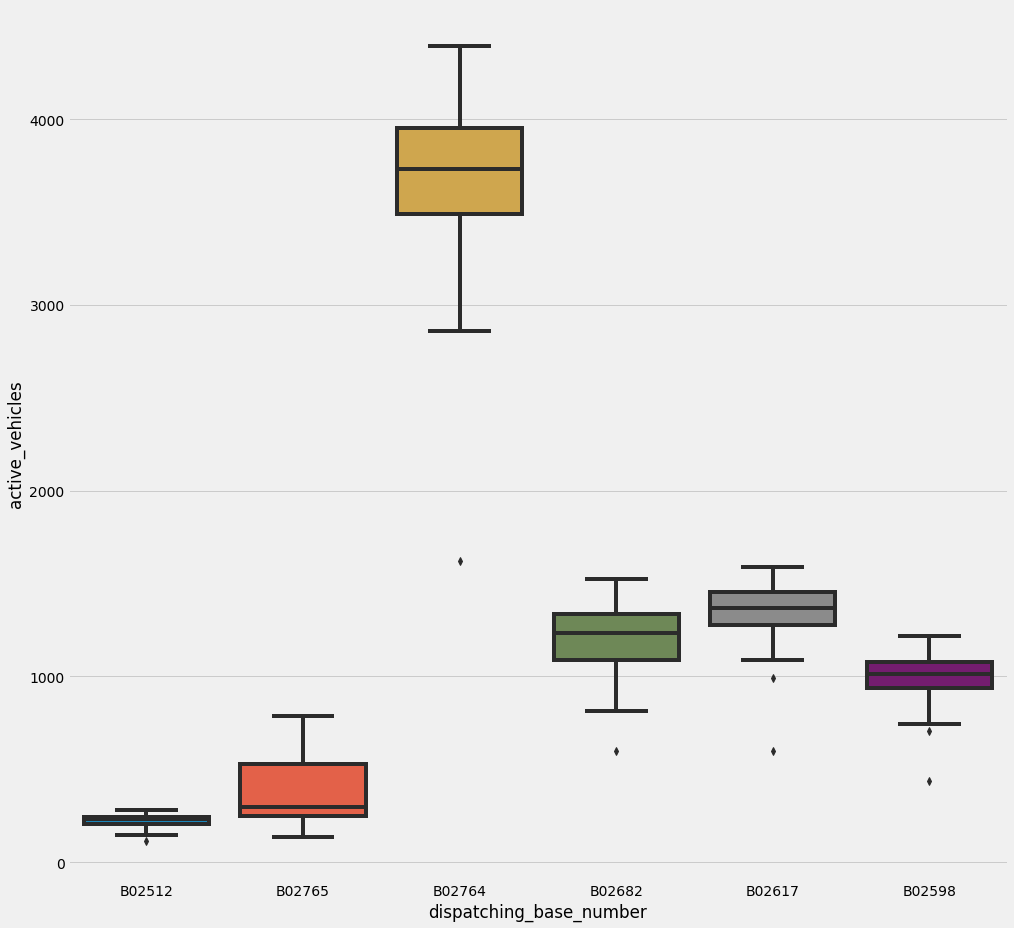

In [ ]:
#2
top_var1 = var1 = df2.groupby(["dispatching_base_number","active_vehicles"])["active_vehicles"].sum().reset_index(name="count")
plt.figure(figsize=(15,15))
sns.boxplot(data=df2 ,x="dispatching_base_number" ,y="active_vehicles")

In [ ]:
top_var3

,dispatching_base_number,count
0,B02512,93786
1,B02765,193670
2,B02598,540791
3,B02682,662509
4,B02617,725025
5,B02764,1914449


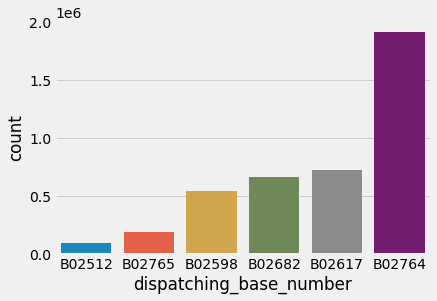

In [ ]:
#3
top_var3 = df2.groupby(["dispatching_base_number"])["trips"].sum().sort_values().reset_index(name="count")
sns.barplot(data=top_var3 ,x="dispatching_base_number" ,y="count")

In [ ]:
#4
var7 = df2.groupby(["date","active_vehicles"])["trips"].mean().reset_index(name="Trip mean")
var7


,date,active_vehicles,Trip mean
0,1,190,1132.0
1,1,193,1377.0
2,1,225,1765.0
3,1,289,2672.0
4,1,870,6903.0
...,...,...,...
348,31,309,3282.0
349,31,1027,11642.0
350,31,1321,15388.0
351,31,1394,15756.0


In [ ]:
df2["rata-rata perjalanan"] = df2["trips"]//df2["active_vehicles"]

In [ ]:
df2

,dispatching_base_number,date,active_vehicles,trips,month,rata-rata perjalanan
0,B02512,1,190,1132,1,5
1,B02765,1,225,1765,1,7
2,B02764,1,3427,29421,1,8
3,B02682,1,945,7679,1,8
4,B02617,1,1228,9537,1,7
...,...,...,...,...,...,...
349,B02764,28,3952,39812,2,10
350,B02617,28,1372,14022,2,10
351,B02682,28,1386,14472,2,10
352,B02512,28,230,1803,2,7


In [ ]:
total = df2.groupby("date")["rata-rata perjalanan"].mean()

In [ ]:
total

date
1      8.000000
2      7.500000
3      8.083333
4      6.750000
5      6.916667
6      7.833333
7      8.333333
8      8.000000
9      7.583333
10     8.416667
11     7.666667
12     7.750000
13     8.416667
14     8.666667
15     8.916667
16     8.250000
17     8.333333
18     8.583333
19     8.000000
20     8.000000
21     8.583333
22     7.500000
23     7.833333
24     8.916667
25     7.666667
26     7.083333
27     7.500000
28     8.250000
29     7.333333
30     8.833333
31    10.333333
Name: rata-rata perjalanan, dtype: float64